<a href="https://colab.research.google.com/github/EderBer/Comercio_intraindustrial/blob/main/Taller_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploración y Limpieza de los datos

En este análisis de datos, nos embarcaremos en un proceso fundamental para comprender y preparar nuestro conjunto de datos antes de realizar cualquier modelado o análisis más profundo. Las etapas iniciales de exploración y limpieza de datos son cruciales para garantizar la calidad y fiabilidad de los resultados que obtengamos.

La **exploración de datos** nos permitirá familiarizarnos con la estructura del conjunto de datos, identificar las variables presentes, comprender su distribución y detectar posibles patrones o anomalías. Utilizaremos diversas técnicas visuales y estadísticas para obtener una visión general de nuestros datos.

La **limpieza de datos** se centrará en abordar los problemas identificados durante la exploración, como valores faltantes, valores atípicos, inconsistencias o formatos incorrectos. Un conjunto de datos limpio es esencial para evitar sesgos y errores en las etapas posteriores del análisis.

In [67]:
# Primero importamos los datos de la libreria ucimlrepo como se indica en la pagina web.

%pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# variable information
print(adult.variables)

              name     role         type      demographic  \
0              age  Feature      Integer              Age   
1        workclass  Feature  Categorical           Income   
2           fnlwgt  Feature      Integer             None   
3        education  Feature  Categorical  Education Level   
4    education-num  Feature      Integer  Education Level   
5   marital-status  Feature  Categorical            Other   
6       occupation  Feature  Categorical            Other   
7     relationship  Feature  Categorical            Other   
8             race  Feature  Categorical             Race   
9              sex  Feature       Binary              Sex   
10    capital-gain  Feature      Integer             None   
11    capital-loss  Feature      Integer             None   
12  hours-per-week  Feature      Integer             None   
13  native-country  Feature  Categorical            Other   
14          income   Target       Binary           Income   

                       

## Visualizacion de los datos


In [68]:
display(X.head())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


# Tarea
Analizar el conjunto de datos proporcionado realizando visualización y caracterización de datos.

## Resumen estadístico de variables numéricas

### Subtarea:
Generar un resumen estadístico (media, desviación estándar, cuartiles, etc.) para las columnas numéricas.

**Justificación**:
Seleccionar columnas numéricas y generar estadísticas descriptivas.

## Distribución de variables numéricas

### Subtarea:
Visualizar la distribución de las variables numéricas utilizando histogramas o diagramas de caja.

**Justificación**:
Visualizar la distribución de cada columna numérica utilizando histogramas.

## Conteo de valores para variables categóricas

### Subtarea:
Obtener el conteo de cada categoría para las variables categóricas.

**Justificación**:
Seleccionar las columnas categóricas e iterar sobre ellas para obtener el conteo de valores.

## Visualización de variables categóricas

### Subtarea:
Visualizar la distribución de las variables categóricas utilizando gráficos de barras.

**Justificación**:
Visualizar la distribución de variables categóricas utilizando gráficos de barras según lo solicitado en las instrucciones de la subtarea.

## Análisis de la variable objetivo

### Subtarea:
Explorar la distribución de la variable objetivo (`income`).

**Justificación**:
Obtener el conteo de valores para la columna de ingresos y luego visualizar la distribución utilizando un gráfico de barras.

## Relación entre variables

### Subtarea:
Investigar la relación entre pares de variables utilizando gráficos de dispersión o tablas de contingencia, según corresponda.

**Justificación**:
Visualizar la relación entre pares de variables numéricas y entre variables numéricas y categóricas utilizando los gráficos apropiados.

**Justificación**:
Crear tablas de contingencia y visualizar las relaciones entre las variables categóricas clave y la variable objetivo 'income' utilizando gráficos de conteo.

**Justificación**:
El bloque de código anterior falló porque pandas no fue importado. Importar pandas y regenerar el bloque de código para crear tablas de contingencia y visualizar las relaciones entre las variables categóricas clave y la variable objetivo 'income'.

## Manejo de valores faltantes

### Subtarea:
Identificar y visualizar la cantidad de valores faltantes en cada columna.

**Justificación**:
Calcular y visualizar el número de valores faltantes en cada columna del dataframe combinado.

## Resumen:

### Hallazgos clave del análisis de datos

* Las columnas numéricas en el conjunto de datos son 'age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss' y 'hours-per-week'.
* Las columnas categóricas en el conjunto de datos son 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex' y 'native-country'.
* La variable objetivo 'income' tiene una distribución desequilibrada, con significativamente más instancias en las categorías `<=50K` y `<=50K.` en comparación con las categorías `>50K` y `>50K.`.
* Se identificaron valores faltantes en las columnas 'workclass' (963 valores faltantes), 'occupation' (966 valores faltantes) y 'native-country' (274 valores faltantes).

### Conclusiones o próximos pasos

* La presencia de categorías redundantes en la variable 'income' (`<=50K` vs `<=50K.` y `>50K` vs `>50K.`) debe abordarse mediante la limpieza de datos fusionando estas categorías.
* Los valores faltantes en 'workclass', 'occupation' y 'native-country' requieren imputación o manejo antes de un análisis posterior o la construcción de modelos.

**Reasoning**:
Select numeric columns and generate descriptive statistics.



In [69]:
numeric_cols = X.select_dtypes(include=['int64', 'float64'])
display(numeric_cols.describe())

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## Distribución de variables numéricas

### Subtask:
Visualizar la distribución de las variables numéricas utilizando histogramas o box plots.


**Reasoning**:
Visualize the distribution of each numeric column using histograms.



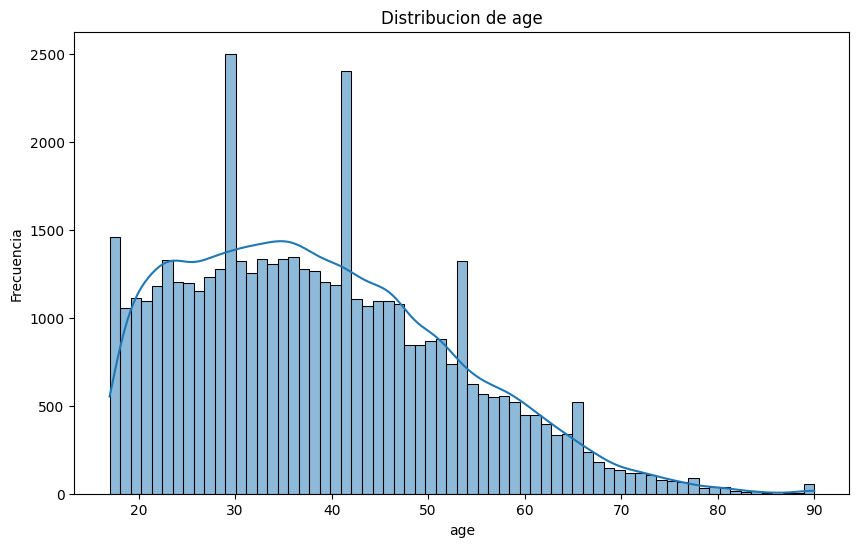

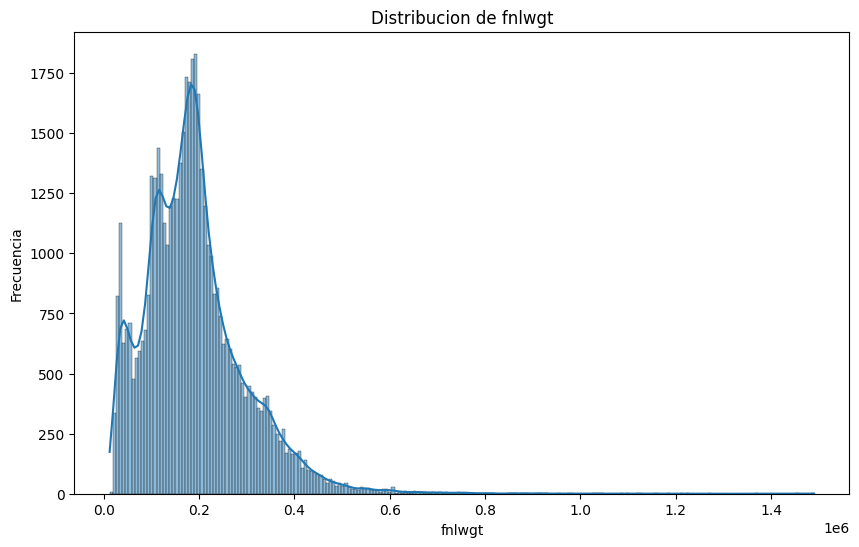

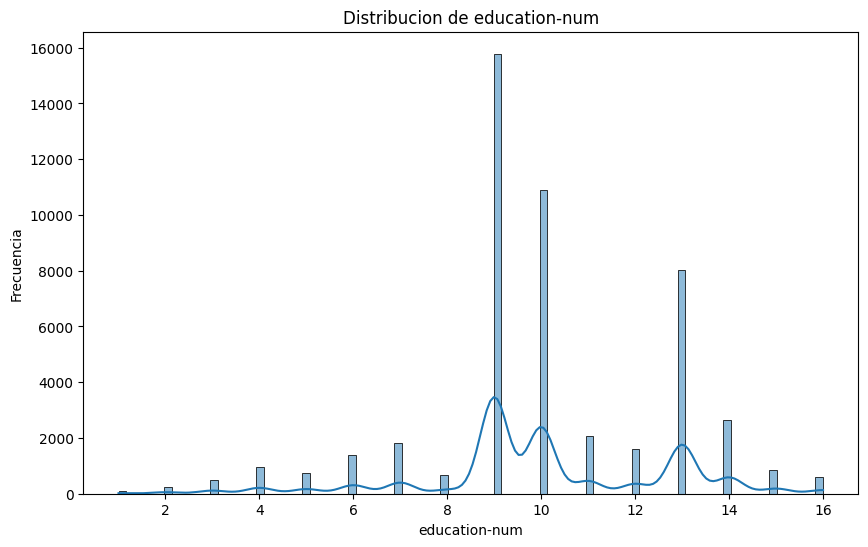

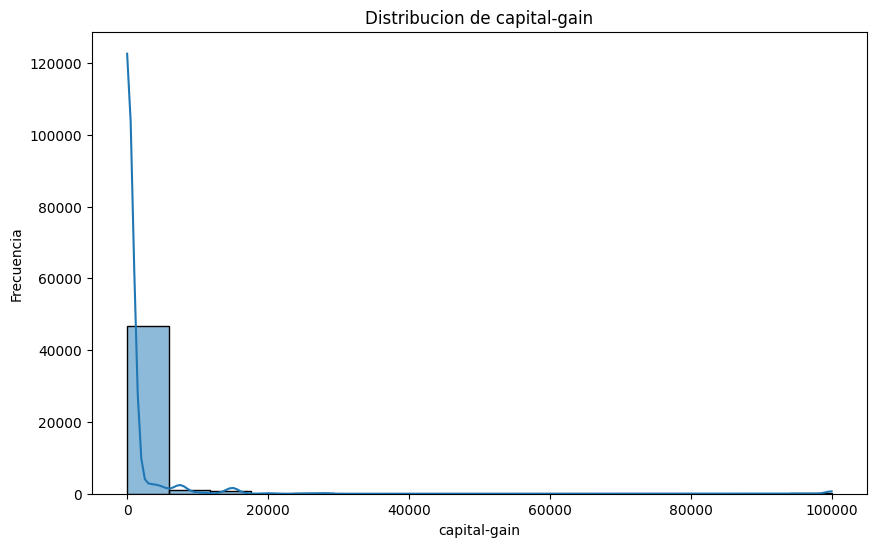

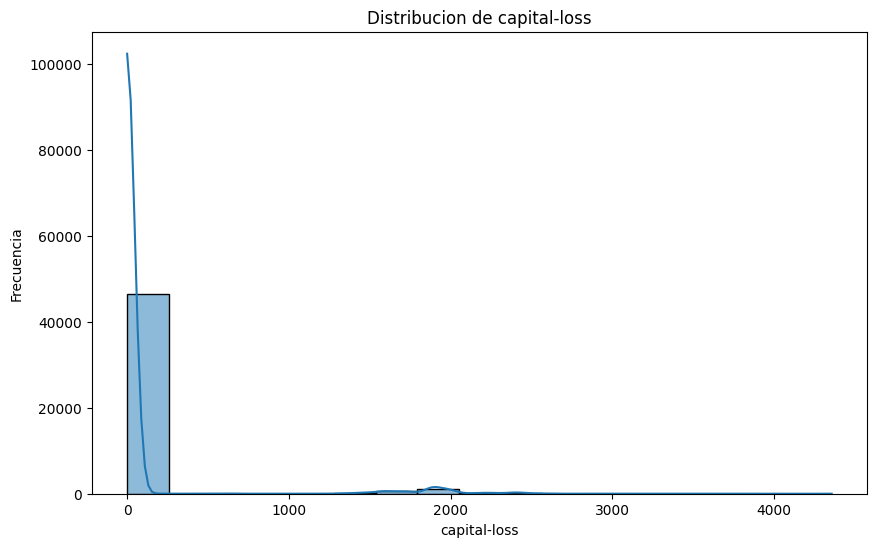

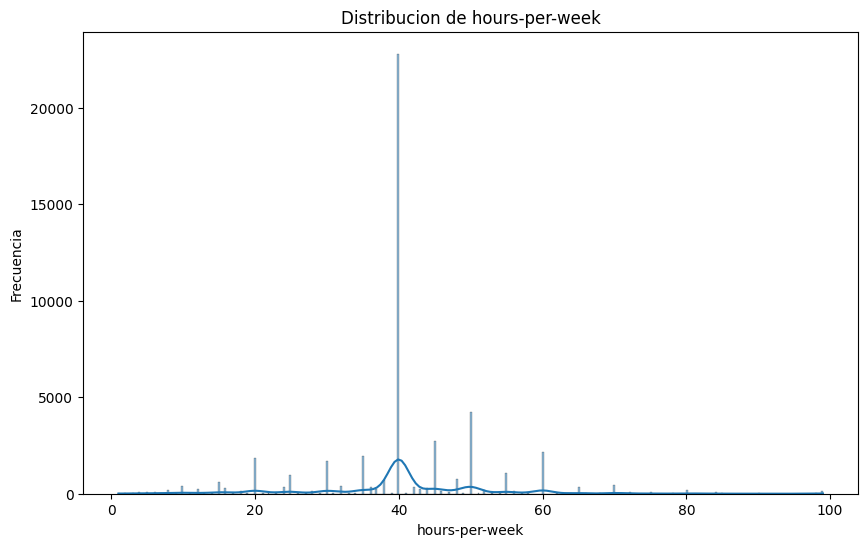

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols.columns:
  plt.figure(figsize=(10, 6))
  sns.histplot(data=numeric_cols, x=col, kde=True)
  plt.title(f'Distribucion de {col}')
  plt.xlabel(col)
  plt.ylabel('Frecuencia')
  plt.show()

## Conteo de valores para variables categóricas

### Subtask:
Obtener el conteo de cada categoría para las variables categóricas.


**Reasoning**:
Select the categorical columns and iterate through them to get value counts.



In [71]:
categorical_cols = X.select_dtypes(include=['object', 'category'])

for col in categorical_cols.columns:
  print(f"Conteo de valores para la columna: {col}")
  display(categorical_cols[col].value_counts())
  print("\n")

Conteo de valores para la columna: workclass


,count
workclass,
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
State-gov,1981
?,1836
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10




Conteo de valores para la columna: education


,count
education,
HS-grad,15784
Some-college,10878
Bachelors,8025
Masters,2657
Assoc-voc,2061
11th,1812
Assoc-acdm,1601
10th,1389
7th-8th,955




Conteo de valores para la columna: marital-status


,count
marital-status,
Married-civ-spouse,22379
Never-married,16117
Divorced,6633
Separated,1530
Widowed,1518
Married-spouse-absent,628
Married-AF-spouse,37




Conteo de valores para la columna: occupation


,count
occupation,
Prof-specialty,6172
Craft-repair,6112
Exec-managerial,6086
Adm-clerical,5611
Sales,5504
Other-service,4923
Machine-op-inspct,3022
Transport-moving,2355
Handlers-cleaners,2072




Conteo de valores para la columna: relationship


,count
relationship,
Husband,19716
Not-in-family,12583
Own-child,7581
Unmarried,5125
Wife,2331
Other-relative,1506




Conteo de valores para la columna: race


,count
race,
White,41762
Black,4685
Asian-Pac-Islander,1519
Amer-Indian-Eskimo,470
Other,406




Conteo de valores para la columna: sex


,count
sex,
Male,32650
Female,16192




Conteo de valores para la columna: native-country


,count
native-country,
United-States,43832
Mexico,951
?,583
Philippines,295
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151


## Visualización de variables categóricas

### Subtask:
Visualizar la distribución de las variables categóricas utilizando gráficos de barras.


**Reasoning**:
Visualize the distribution of categorical variables using bar plots as requested by the subtask instructions.



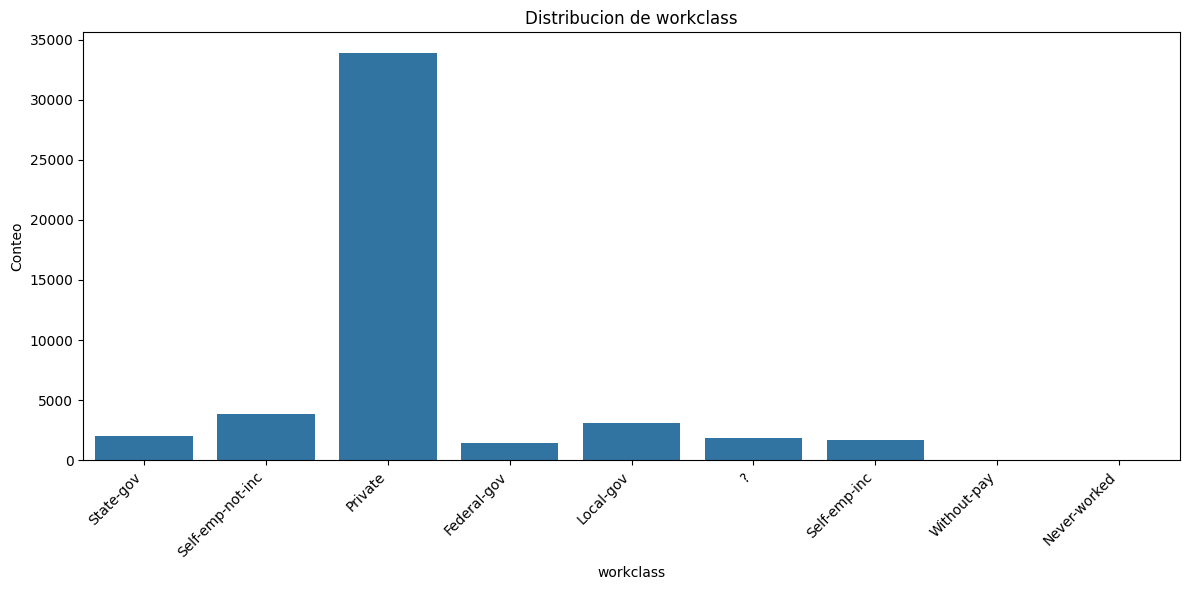

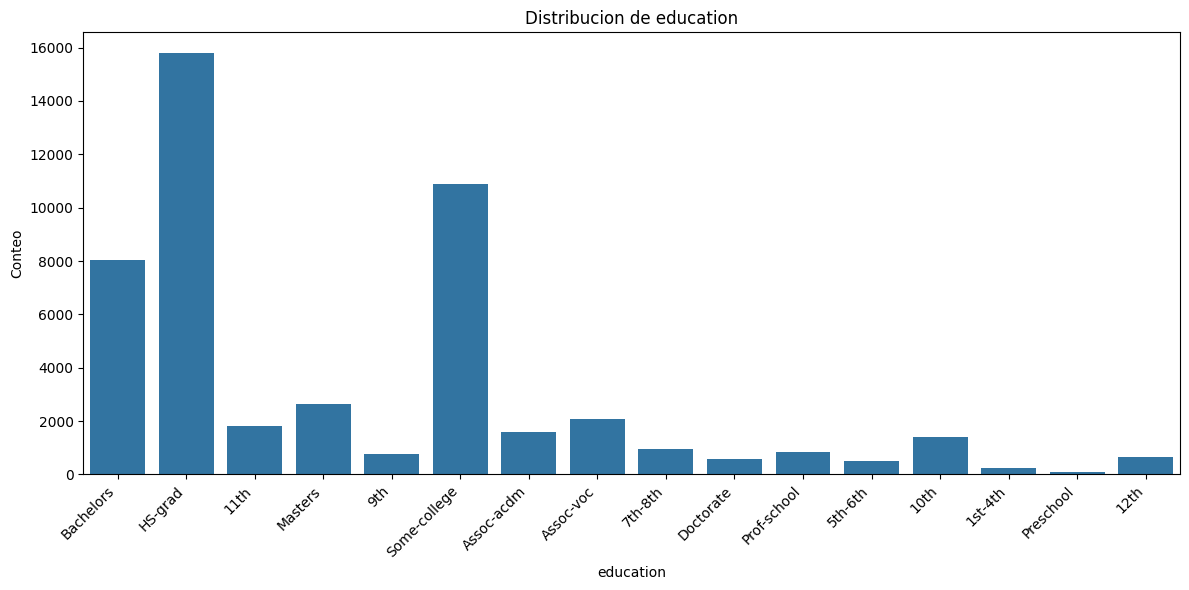

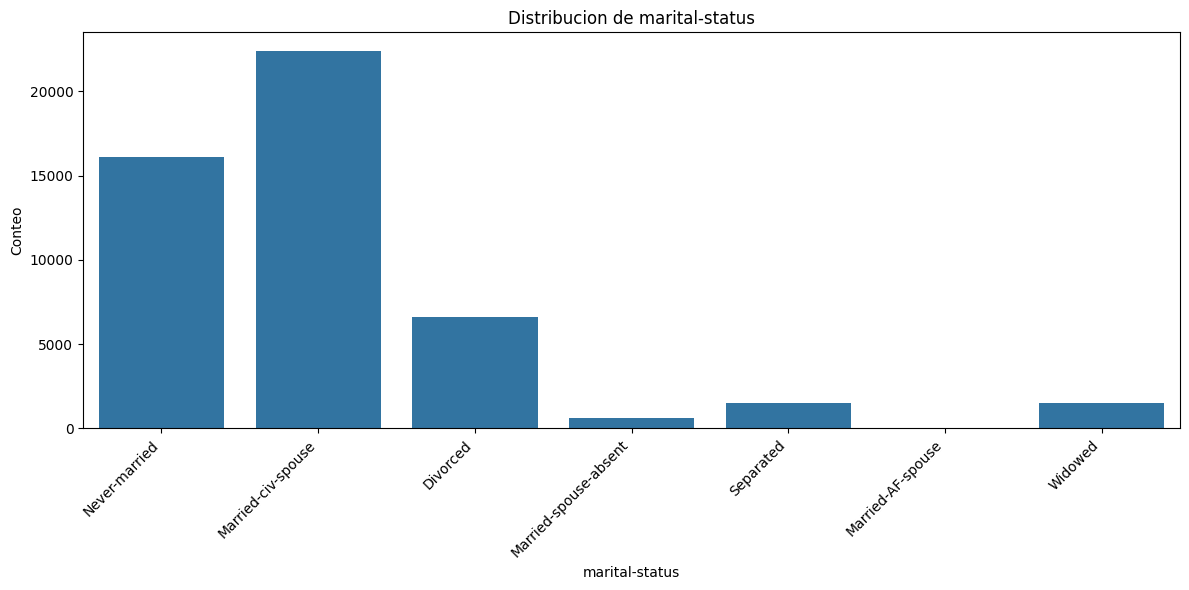

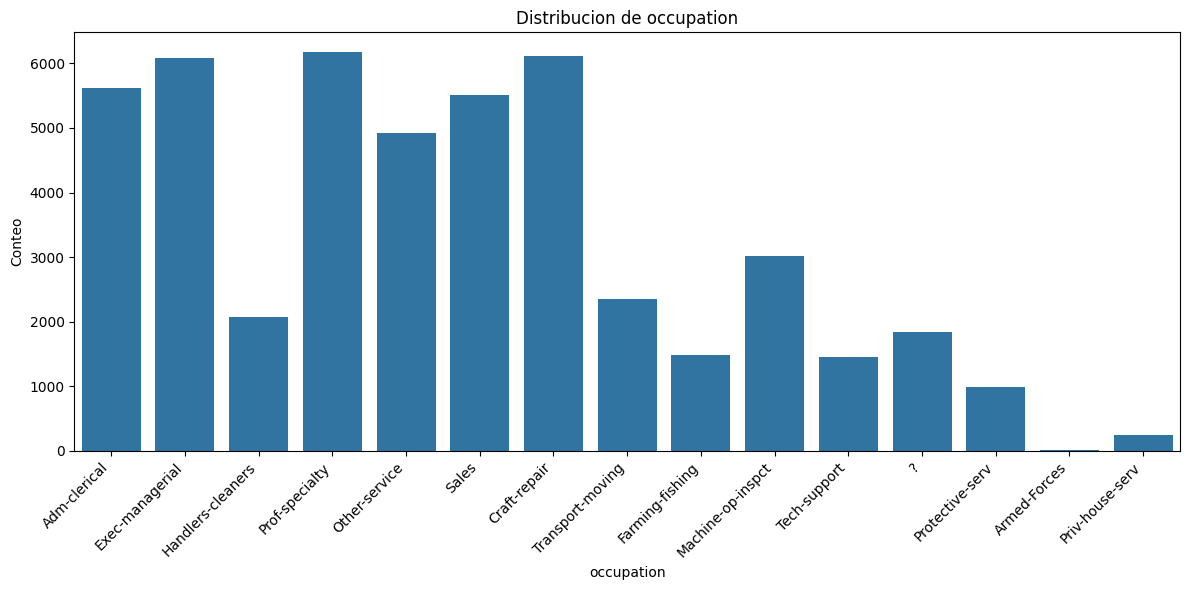

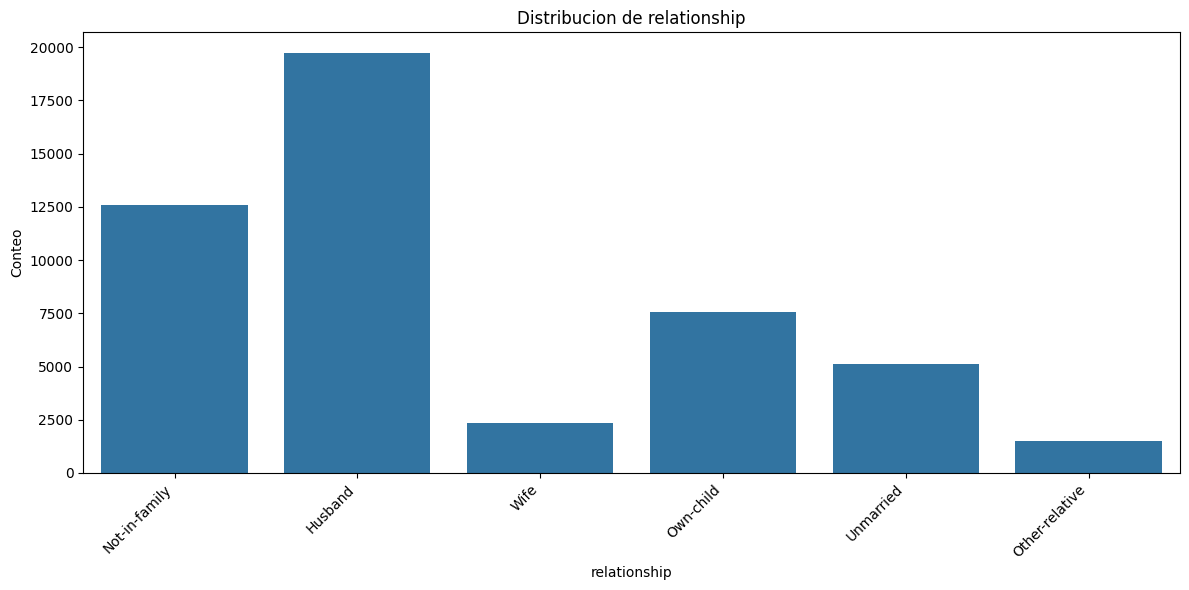

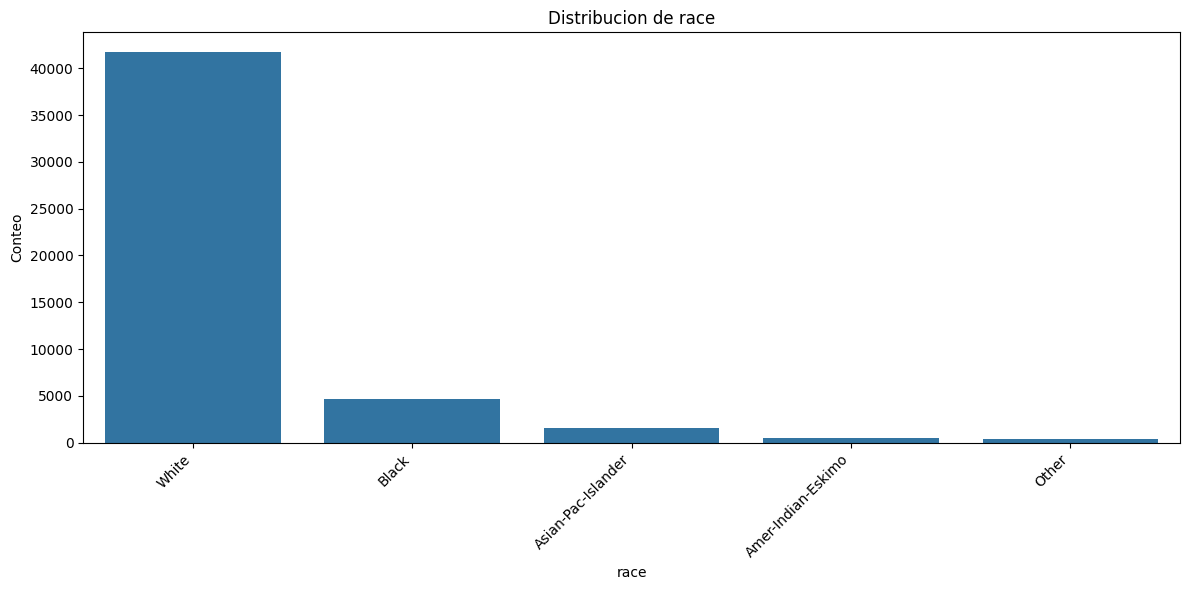

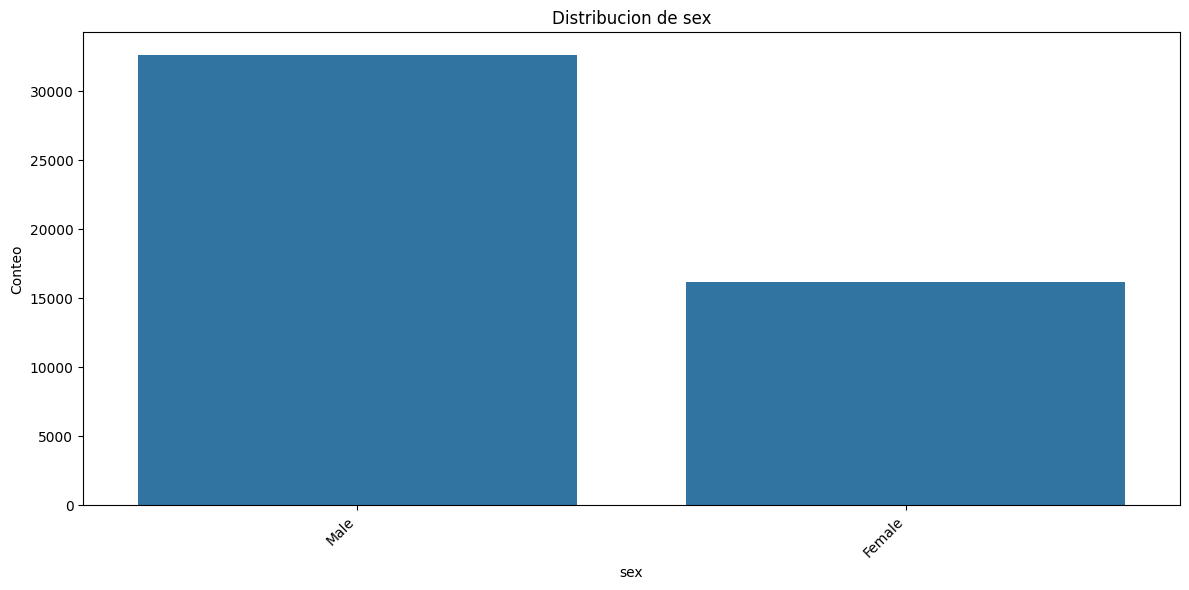

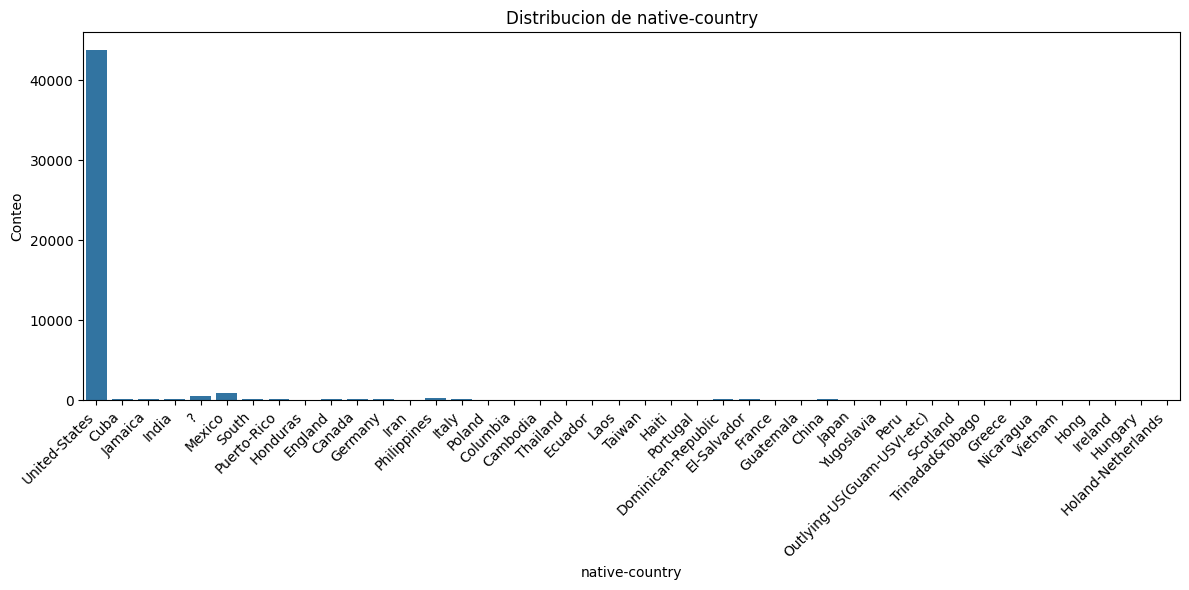

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in categorical_cols.columns:
  plt.figure(figsize=(12, 6))
  sns.countplot(data=categorical_cols, x=col)
  plt.title(f'Distribucion de {col}')
  plt.xlabel(col)
  plt.ylabel('Conteo')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

## Manejo de valores faltantes

### Subtask:
Identificar y visualizar la cantidad de valores faltantes en cada columna.


**Reasoning**:
Calculate and visualize the number of missing values in each column of the combined dataframe.



Numero de missing values por columna:


,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


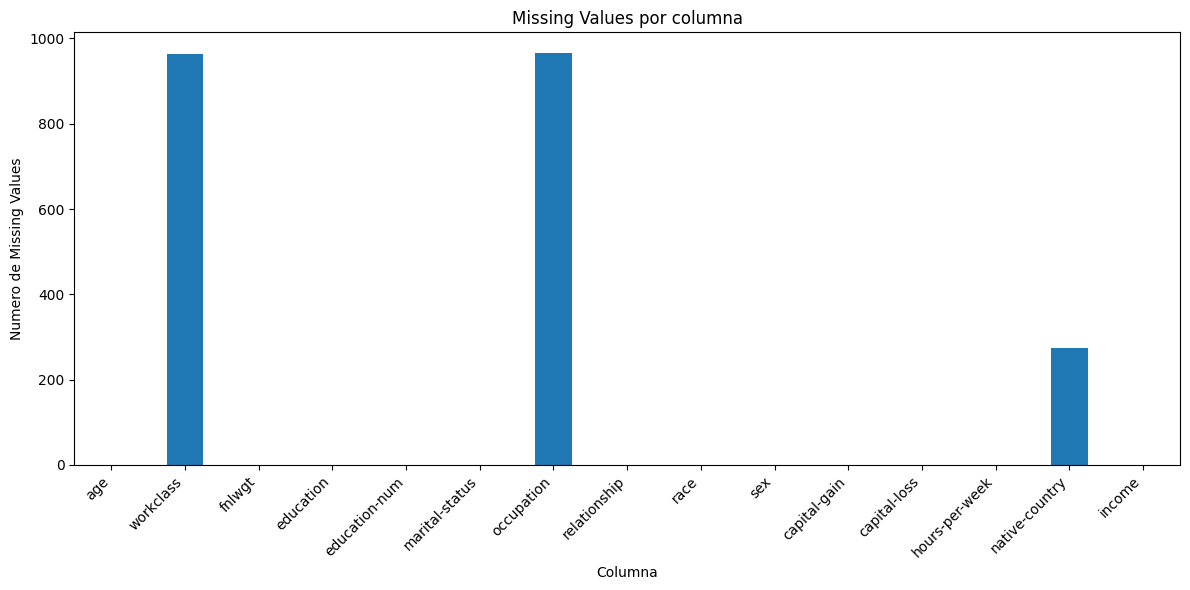

In [73]:
missing_values = df_combined.isnull().sum()

print("Numero de missing values por columna:")
display(missing_values)

plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values por columna')
plt.xlabel('Columna')
plt.ylabel('Numero de Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Resumen:

### Hallazgos clave del análisis de datos

* Las columnas numéricas en el conjunto de datos son 'age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss' y 'hours-per-week'.
* Las columnas categóricas en el conjunto de datos son 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex' y 'native-country'.
* Se identificaron valores faltantes en las columnas 'workclass' (963 valores faltantes), 'occupation' (966 valores faltantes) y 'native-country' (274 valores faltantes).

### Conclusiones o próximos pasos

* Los valores faltantes en 'workclass', 'occupation' y 'native-country' requieren imputación o manejo antes de un análisis posterior o la construcción de modelos. Eso es justo lo que vamos a hacer

## Identificar y eliminar duplicados

### Subtarea:
Escribir código para identificar si hay filas duplicadas en el conjunto de datos y eliminarlas.


**Justificación**:
Identificar y eliminar filas duplicadas del dataframe combinado según lo solicitado en la subtarea.

In [74]:
# Identificar filas duplicadas
duplicated_rows = df_combined.duplicated().sum()

print(f"Se encontraron {duplicated_rows} filas duplicadas.")

# Eliminar filas duplicadas
df_combined_cleaned = df_combined.drop_duplicates()

# Verificar la nueva forma del DataFrame
print(f"Forma del DataFrame después de eliminar duplicados: {df_combined_cleaned.shape}")

Se encontraron 48 filas duplicadas.
Forma del DataFrame después de eliminar duplicados: (48794, 15)


## Identificar valores extraños y faltantes en variables categóricas

### Subtarea:
Inspeccionar las variables categóricas para identificar valores atípicos, inconsistencias y valores faltantes representados con '?'.

In [75]:
# Inspeccionar las variables categóricas
categorical_cols = df_combined_cleaned.select_dtypes(include=['object', 'category']).columns.tolist()

for col in categorical_cols:
  print(f"Valores únicos para la columna: {col}")
  display(df_combined_cleaned[col].unique())
  print("\n")

Valores únicos para la columna: workclass


array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked',
       nan], dtype=object)



Valores únicos para la columna: education


array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)



Valores únicos para la columna: marital-status


array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)



Valores únicos para la columna: occupation


array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv', nan], dtype=object)



Valores únicos para la columna: relationship


array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)



Valores únicos para la columna: race


array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)



Valores únicos para la columna: sex


array(['Male', 'Female'], dtype=object)



Valores únicos para la columna: native-country


array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands', nan], dtype=object)



Valores únicos para la columna: income


array(['<=50K', '>50K'], dtype=object)

## Imputar valores faltantes en variables categóricas

### Subtarea:
Reemplazar los valores faltantes (incluyendo '?') en las columnas categóricas con la moda de cada columna.

**Justificación**:
Iterar a través de las columnas categóricas e imprimir sus valores únicos para identificar inconsistencias y valores faltantes.

**Justificación**:
Reemplazar los valores faltantes (incluyendo '?') en las columnas categóricas con la moda de cada columna en el DataFrame `df_combined_cleaned`.

In [76]:
# Identify categorical columns with missing values
categorical_cols_with_missing = ['workclass', 'occupation', 'native-country']

# Replace '?' with NaN for consistent handling of missing values
for col in categorical_cols_with_missing:
  df_combined_cleaned[col] = df_combined_cleaned[col].replace('?', pd.NA)

# Impute missing values with the mode
for col in categorical_cols_with_missing:
  mode_value = df_combined_cleaned[col].mode()[0]
  df_combined_cleaned[col] = df_combined_cleaned[col].fillna(mode_value)

# Verify that missing values have been handled
print("Number of missing values after imputation:")
display(df_combined_cleaned.isnull().sum())

# Verify that '?' values have been replaced
print("\nUnique values in categorical columns after imputation:")
for col in categorical_cols_with_missing:
  print(f"Unique values for column: {col}")
  display(df_combined_cleaned[col].unique())
  print("\n")

/tmp/ipython-input-3088700226.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_cleaned[col] = df_combined_cleaned[col].replace('?', pd.NA)
/tmp/ipython-input-3088700226.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_cleaned[col] = df_combined_cleaned[col].fillna(mode_value)


Number of missing values after imputation:


,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0



Unique values in categorical columns after imputation:
Unique values for column: workclass


array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)



Unique values for column: occupation


array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)



Unique values for column: native-country


array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico', 'South',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

## Verificar la imputación

### Subtarea:
Confirmar que los valores faltantes se han imputado correctamente.

**Justificación**:
Calcular y mostrar el número de valores faltantes para todas las columnas en el DataFrame `df_combined_cleaned` para confirmar que no quedan valores faltantes. Luego, para cada una de las columnas categóricas donde se realizó la imputación ('workclass', 'occupation', 'native-country'), imprimir los valores únicos para verificar que los caracteres '?' han sido reemplazados con éxito y que los valores de la moda están presentes.

In [77]:
# Calcular y mostrar el número de valores faltantes para todas las columnas
print("Número de valores faltantes por columna después de la imputación:")
display(df_combined_cleaned.isnull().sum())

# Imprimir valores únicos para las columnas imputadas para verificar
categorical_cols_imputed = ['workclass', 'occupation', 'native-country']

print("\nValores únicos en columnas categóricas después de la imputación:")
for col in categorical_cols_imputed:
  print(f"Valores únicos para la columna: {col}")
  display(df_combined_cleaned[col].unique())
  print("\n")

Número de valores faltantes por columna después de la imputación:


,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0



Valores únicos en columnas categóricas después de la imputación:
Valores únicos para la columna: workclass


array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)



Valores únicos para la columna: occupation


array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)



Valores únicos para la columna: native-country


array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico', 'South',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

## Identificar y eliminar duplicados

### Subtarea:
Escribir código para identificar si hay filas duplicadas en el conjunto de datos y eliminarlas.

## Resumen:

### Hallazgos clave de la limpieza de datos

* Se encontraron y eliminaron un total de 48 filas duplicadas del conjunto de datos.
* La inspección de las variables categóricas identificó que los valores '?' y NaN que representaban datos faltantes estaban presentes en las columnas 'workclass', 'occupation' y 'native-country'.
* Después de la imputación con la moda de cada columna, el número de valores faltantes para todas las columnas fue cero.
* El carácter '?' fue reemplazado con éxito en las columnas 'workclass', 'occupation' y 'native-country'.

## **Resultados**

In [78]:
display(df_combined_cleaned)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K
